In [2]:
#Arrays

import numpy as np

twodee = np.array([[2,2,2,2],[3,3,3,3],[7,1,1,1]])

#indexing our new 2D array

twodee[0]

array([2, 2, 2, 2])

In [3]:
twodee[1]

array([3, 3, 3, 3])

In [4]:
twodee[2][0] #can also do twodee[2,0]

7

In [5]:
twodee

array([[2, 2, 2, 2],
       [3, 3, 3, 3],
       [7, 1, 1, 1]])

In [6]:
twodee[:,0]

#gives you the first column (first number in every row)

array([2, 3, 7])

In [7]:
#3D Arrays

twodee1 = np.array([[1,1,1,1],[4,4,4,4],[8,6,6,6]])

In [8]:
threedee = np.array([twodee, twodee1])

In [9]:
threedee

array([[[2, 2, 2, 2],
        [3, 3, 3, 3],
        [7, 1, 1, 1]],

       [[1, 1, 1, 1],
        [4, 4, 4, 4],
        [8, 6, 6, 6]]])

In [13]:
#Indexing a 3D array
#trying to index 7

threedee[0,2,0]

7

In [16]:
#indexing 8

threedee[1,2,0]

8

In [15]:
threedee.shape

#this function gives the depth, length, and width of the array
#2 "stacked panels" of values, 3 rows, 4 columns

(2, 3, 4)

In [21]:
import xarray as xr

#xarray is fast and easy to use with multidimensional arrays
#DataArray is xarrays implementation of a labeled, N-dimensionaal array

#Dataset is a multi-dimensional, in-memory array database. Similar to pandas dataframe

In [ ]:
#DataArray
#data: array of values
#coords: a list or dictionary of coordinates (lat long)
#dims: list of dimension names
#attrs: a dictionary of attributes (metadata - i.e. author)
#dimensions provide names that xarray uses instead of the axis argument that numpy uses
#coordinates enable fast label based indexing

In [23]:
#making dataarray from scratch
#2 rows, 3 columns

data = xr.DataArray(np.random.randn(2,3), dims=("x", "y"),coords ={"x":[10,20]})

#coords is labeling the first row as 10, second row as 20

In [24]:
data

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.01497753, -0.97726443,  0.36606054],
       [-0.65180858,  0.88240592,  0.70354287]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [25]:
data.values #outputs the values for each array position

array([[ 0.01497753, -0.97726443,  0.36606054],
       [-0.65180858,  0.88240592,  0.70354287]])

In [26]:
data.dims #gives the labels of the array dimensions

('x', 'y')

In [27]:
data.coords #gives the labels we assigned to the x dimension (rows)

Coordinates:
  * x        (x) int64 10 20

In [28]:
data.attrs #gives attributes, empty because we did not assign any metadata

{}

In [29]:
#Indexing

#index by positional and by integer label, returned object is always another DataArray

data[0,:]

<xarray.DataArray (y: 3)>
array([ 0.01497753, -0.97726443,  0.36606054])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [30]:
#indexing by location: positional and coordinate label, like pandas

data.loc[10]

<xarray.DataArray (y: 3)>
array([ 0.01497753, -0.97726443,  0.36606054])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [32]:
#indexing by integer select: by dimension name and integer label

data.isel(x=0)

<xarray.DataArray (y: 3)>
array([ 0.01497753, -0.97726443,  0.36606054])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [33]:
#indexing by select: by dimension name and coordinate label

data.sel(x=10)

<xarray.DataArray (y: 3)>
array([ 0.01497753, -0.97726443,  0.36606054])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [ ]:
#all of these aboved indexing methods index the "10" coordinate we labeled (first row)

In [34]:
#Attributes

data.attrs["long_name"] = "random velocity"

data.attrs["units"] = "meters/sec"
data.attrs["description"]="A random variable created as an example."
data.attrs["random_attribute"]=123

In [35]:
data.attrs

{'long_name': 'random velocity',
 'units': 'meters/sec',
 'description': 'A random variable created as an example.',
 'random_attribute': 123}

In [36]:
#Math with Arrays

data + 10 #adds 10 to each value

<xarray.DataArray (x: 2, y: 3)>
array([[10.01497753,  9.02273557, 10.36606054],
       [ 9.34819142, 10.88240592, 10.70354287]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [37]:
np.sin(data) #takes the sine of each value

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.01497697, -0.82897049,  0.35793977],
       [-0.6066252 ,  0.77226958,  0.64692337]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             meters/sec
    description:       A random variable created as an example.
    random_attribute:  123

In [38]:
data.T #transposes the array

<xarray.DataArray (y: 3, x: 2)>
array([[ 0.01497753, -0.65180858],
       [-0.97726443,  0.88240592],
       [ 0.36606054,  0.70354287]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             meters/sec
    description:       A random variable created as an example.
    random_attribute:  123

In [39]:
data.sum() #sums the data

<xarray.DataArray ()>
array(0.33791385)

In [40]:
data.mean(dim="x") #gives the mean of all the x values for each y (aka mean of each column)

<xarray.DataArray (y: 3)>
array([-0.31841553, -0.04742925,  0.5348017 ])
Dimensions without coordinates: y

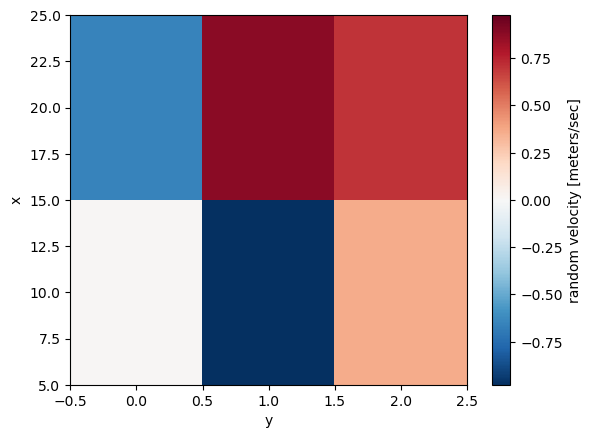

In [41]:
#Plotting

data.plot()

Text(0.5, 1.0, 'random stuff')

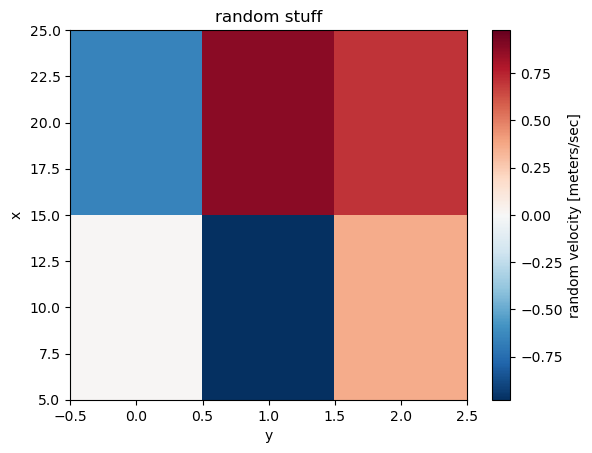

In [45]:
import matplotlib.pyplot as plt

fig,ax1 = plt.subplots()
data.plot(ax=ax1)

ax1.set_title('random stuff')